In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [157]:
%matplotlib notebook

In [239]:
def _triangle_func(t, x0):
    return lambda x: np.where(np.abs(x - x0) <= t, 1 / t * (1 - np.abs(x - x0) / t), 0)

In [162]:
def _triangle3d_func(t, x0):
    t = t[:, None, None]
    x0 = x0[:, None, None]
    
    return lambda x: np.where(np.linalg.norm((x - x0) / t, axis=0) <= 1, 
                              (1 - np.linalg.norm((x - x0) / t, axis=0)), 0) / (t[0] * t[1])

In [167]:
def _gaussian_func(t, x0):
    return lambda x: np.exp(-(x - x0)**2 / (2 * t**2)) / t

In [173]:
def _gaussian3d_func(t, x0):
    t = t[:, None, None]
    x0 = x0[:, None, None]
    
    return lambda x: np.exp(-np.sum((x - x0)**2 / (2 * t**2), axis=0)) / (t[0] * t[1])

In [184]:
def _exp_func(t, x0):
    return lambda x: np.exp(-np.abs(x - x0) / t) / (2 * t)

In [191]:
def _exp3d_func(t, x0):
    t = t[:, None, None]
    x0 = x0[:, None, None]
    
    return lambda x: np.exp(-np.linalg.norm((x - x0) / t, axis=0)) / (2 * t[0] * t[0])

In [199]:
def _cauchy_func(t, x0):
    return lambda x: t / (t**2 + (x - x0)**2)

In [235]:
def _cauchy3d_func(t, x0):
    t = t[:, None, None]
    x0 = x0[:, None, None]
    
    return lambda x: 1 / ((t[0] * t[1])**2 + np.sum((x - x0)**2 / t, axis=0))

In [241]:
def _plot_example_function(f):
    t = 2
    x0 = 1
    x = np.linspace(-10, 10, 129)
    
    plt.figure()
    plt.plot(f(t, x0)(x))

In [215]:
def _plot_example_function3d(f):
    t = np.array([1, 2])
    x0 = np.array([1, 1])
    tri3d = _triangle3d_func(t, x0)
    x1 = np.linspace(-10, 10, 129)
    y1 = np.linspace(-10, 10, 129)
    x = np.array(np.meshgrid(x1, y1))
    
    X, Y = np.meshgrid(x1, y1)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, f(t, x0)(x))

<IPython.core.display.Javascript object>


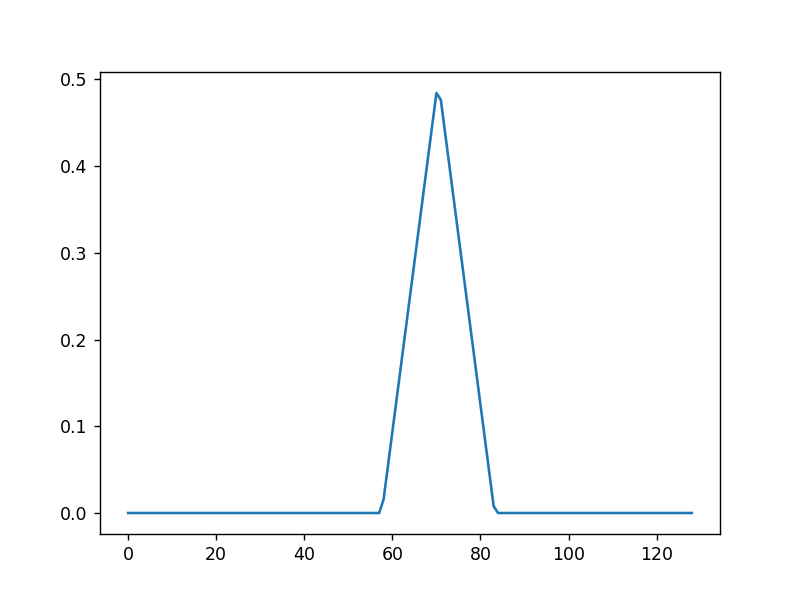

In [242]:
_plot_example_function(_triangle_func)

<IPython.core.display.Javascript object>


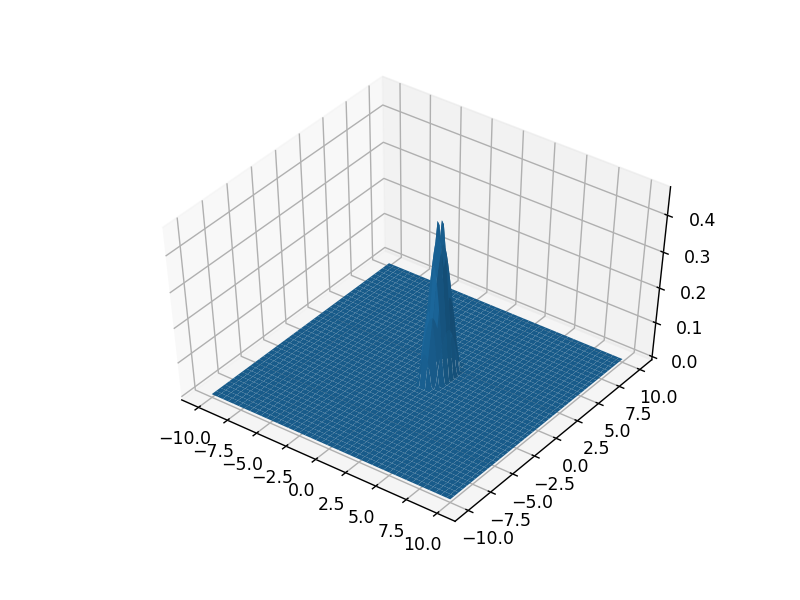

In [243]:
_plot_example_function3d(_triangle3d_func)

<IPython.core.display.Javascript object>


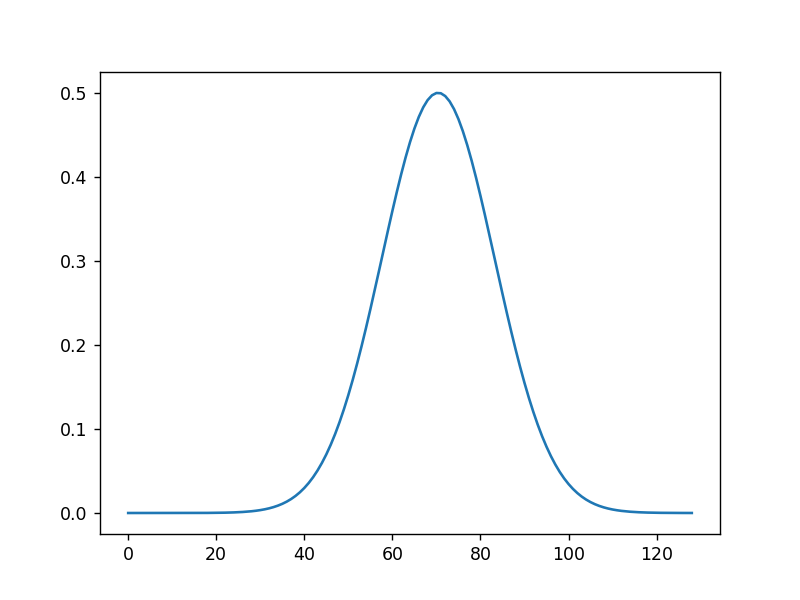

In [244]:
_plot_example_function(_gaussian_func)

<IPython.core.display.Javascript object>


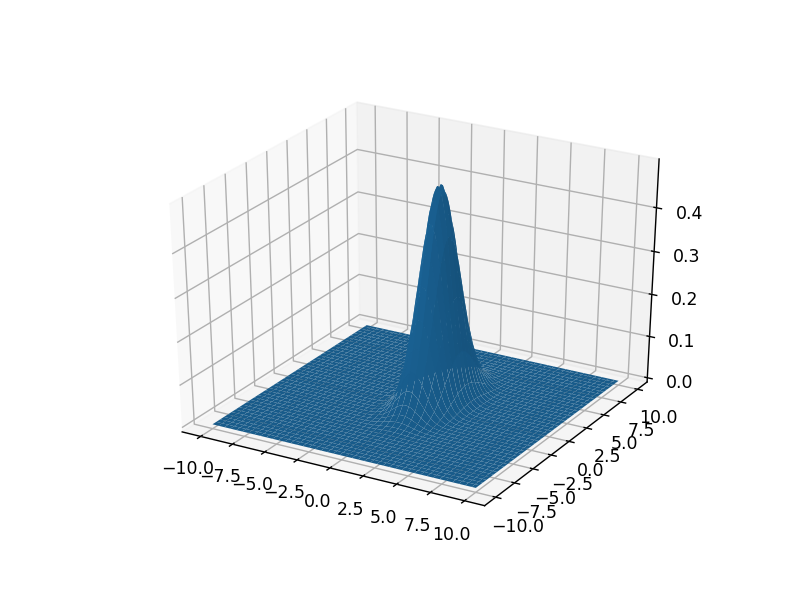

In [245]:
_plot_example_function3d(_gaussian3d_func)

<IPython.core.display.Javascript object>


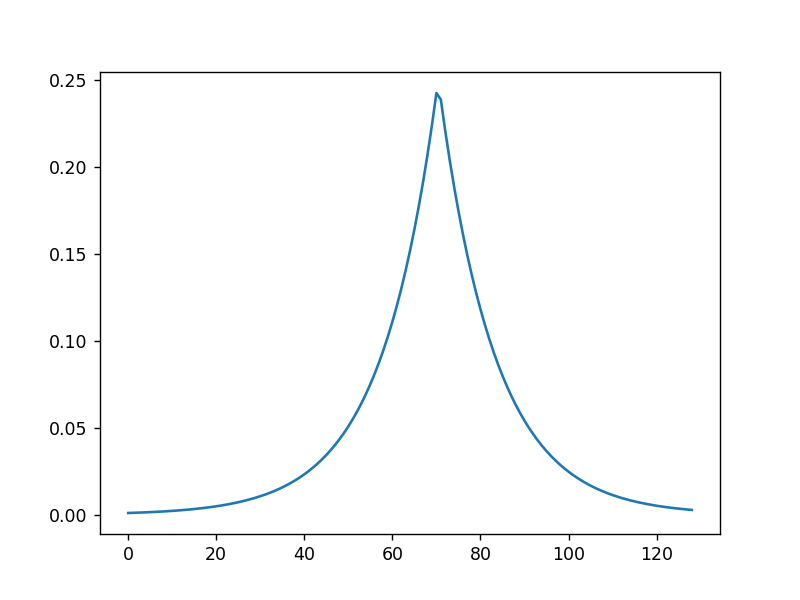

In [246]:
_plot_example_function(_exp_func)

<IPython.core.display.Javascript object>


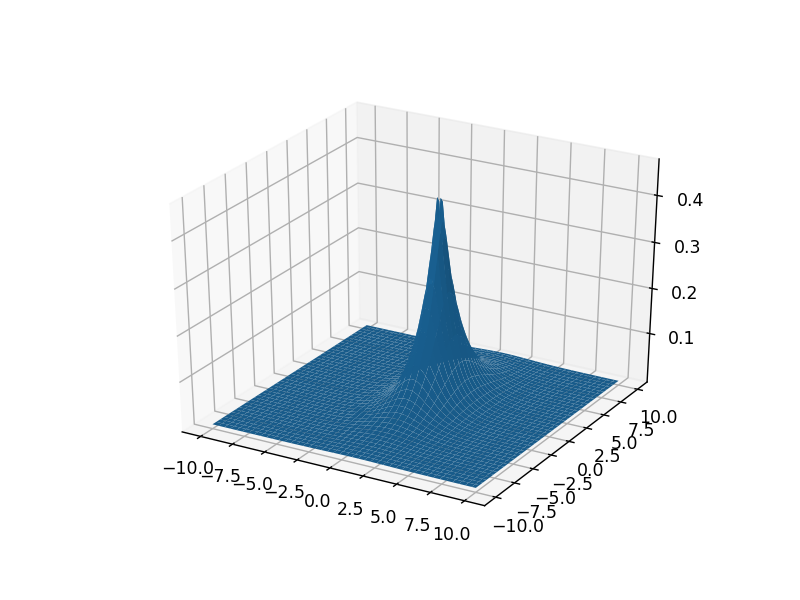

In [247]:
_plot_example_function3d(_exp3d_func)

<IPython.core.display.Javascript object>


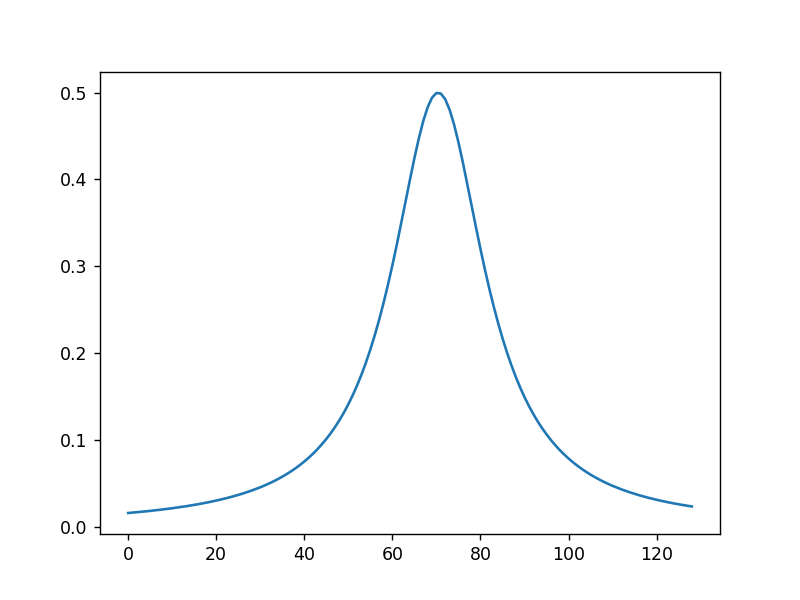

In [216]:
_plot_example_function(_cauchy_func)

<IPython.core.display.Javascript object>


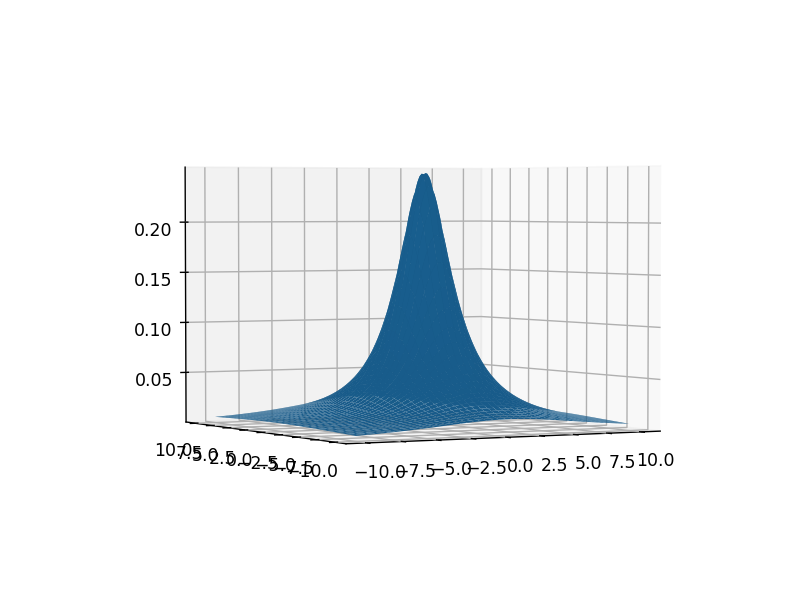

In [248]:
_plot_example_function3d(_cauchy3d_func)

<IPython.core.display.Javascript object>


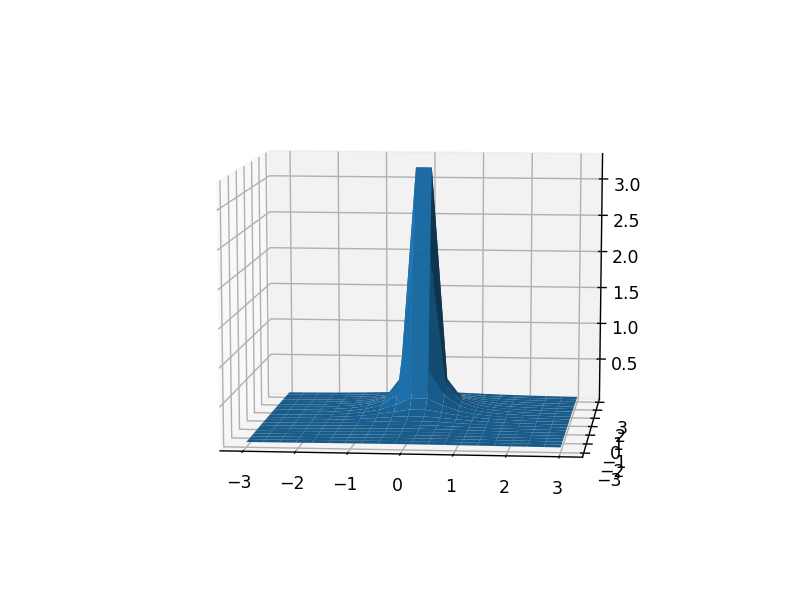

In [236]:
t = np.array([.1, .2])
x0 = np.array([0, 1])
x = np.array(np.meshgrid(x1, y1))
z = _cauchy3d_func(t, x0)(x)

X, Y = np.meshgrid(x1, y1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, z)